# Load Dataset

In [ ]:
!gdown --id 1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1nLdjq_y0hJ4_A-kH6MZb9x-GDk4sNrRY
To: /content/adult.csv
100% 4.10M/4.10M [00:00<00:00, 208MB/s]


# Preprocessing and Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/adult.csv'
df = pd.read_csv(file_path)

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# Replace '?' with NaN for handling missing values
df.replace(' ?', pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop the 'income' column as it is not needed for unsupervised learning
df_unsupervised = df.drop(columns=['income'])

# Split the features into categorical and numerical
categorical_features = df_unsupervised.select_dtypes(include=['object']).columns
numerical_features = df_unsupervised.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df_unsupervised[numerical_features])

# One-hot encoding for categorical features only
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(df_unsupervised[categorical_features])

# Concatenate the scaled numerical and encoded categorical data
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

final_df.to_csv('processed_data.csv', index=False)

final_df.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Apply Clustering

In [ ]:
!gdown --id 1cO2SQHvkg1SWUJgk4FU_mVx_l_NSnrn8

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cO2SQHvkg1SWUJgk4FU_mVx_l_NSnrn8
To: /content/processed_data_adults.csv
100% 16.2M/16.2M [00:00<00:00, 50.1MB/s]


In [ ]:
# Load the newly provided dataset
file_path = '/content/processed_data_adults.csv'
processed_data_df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
processed_data_df.head()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Elbow Method**
The Elbow Method can help identify the optimal number of clusters for K-Means by plotting the Within-Cluster Sum of Squares (WCSS) for different values of
𝑘
k and looking for an "elbow" point where the rate of decrease sharply diminishes. This point suggests a good balance between cluster compactness and complexity.

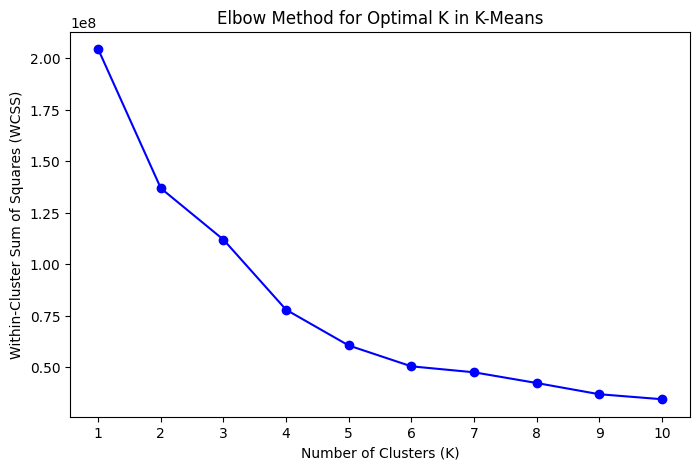

In [ ]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()


In [ ]:
# Define number of clusters for K-Means
n_clusters = 6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
processed_data_df['KMeans_Cluster'] = kmeans.fit_predict(processed_data_df)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
processed_data_df['DBSCAN_Cluster'] = dbscan.fit_predict(processed_data_df)

# PCA for 2D visualizationut
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']))
processed_data_df['PCA1'] = pca_result[:, 0]
processed_data_df['PCA2'] = pca_result[:, 1]

# Calculate evaluation scores
data = processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2'])
silhouette_kmeans = silhouette_score(data,
                                     processed_data_df['KMeans_Cluster'])
silhouette_dbscan = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                     processed_data_df['DBSCAN_Cluster'])
dbi_kmeans = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['KMeans_Cluster'])
dbi_dbscan = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['DBSCAN_Cluster'])

# Print evaluation scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")




Silhouette Score (K-Means): 0.3181300774708701
Silhouette Score (DBSCAN): -0.7938589213663164
Davies-Bouldin Index (K-Means): 1.720233848167391
Davies-Bouldin Index (DBSCAN): 1.0421187698910634


**1. Silhouette Score**

The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It ranges from -1 to +1:

* +1: Indicates that samples are far from neighboring clusters, suggesting well-separated clusters.
* 0: Indicates that samples are close to the boundary between clusters.
* -1: Indicates that samples may have been assigned to the wrong cluster, with distances closer to other clusters than their own.

**Interpretation of Your Values**

* K-Means Silhouette Score: -0.117
* DBSCAN Silhouette Score: -0.385

Both scores are negative, suggesting that samples may be closer to clusters other than their assigned ones. This generally indicates poorly separated clusters or overlap, with DBSCAN performing slightly worse here than K-Means. A higher (closer to +1) score is preferable.

**2. Davies-Bouldin Index**

The Davies-Bouldin Index (DBI) assesses the average “similarity” ratio of each cluster with the most similar cluster. This index is non-negative, where:

* 0: Perfect score, indicating clusters are compact and well-separated.
Higher values indicate worse clustering, with clusters that overlap or have high within-cluster spread.

**Interpretation of Your Values**

* K-Means DBI: 11.03
* DBSCAN DBI: 1.53

The K-Means DBI is quite high, suggesting large overlap and poor separation. The DBSCAN score is considerably better (lower), suggesting it may have produced slightly more compact clusters.

**Summary: Good vs. Bad Clustering**

* Silhouette Score: Closer to +1 is better; scores near 0 or negative suggest poor clustering.
* Davies-Bouldin Index: Lower values are better, ideally approaching 0.
Given these criteria:

DBSCAN appears to have a better Davies-Bouldin Index, meaning the clusters are more compact and less overlapping.
K-Means and DBSCAN both have negative Silhouette Scores, indicating the clustering structure may not be clearly defined.

# Visualization with PCA

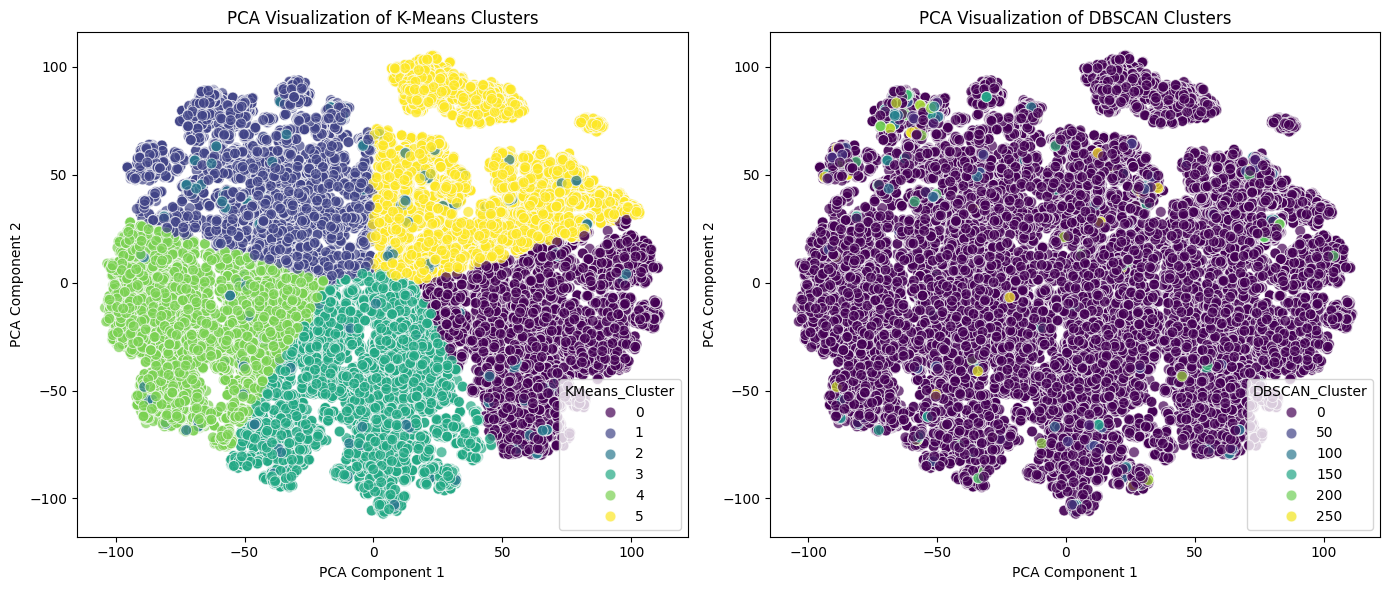

In [ ]:
# Plot PCA visualization for K-Means and DBSCAN clusters
plt.figure(figsize=(14, 6))

# Plot for K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot for DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of DBSCAN Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


# GMM

Silhouette Score (GMM): 0.19026098982683212
Davies-Bouldin Index (GMM): 1.3704014090821346


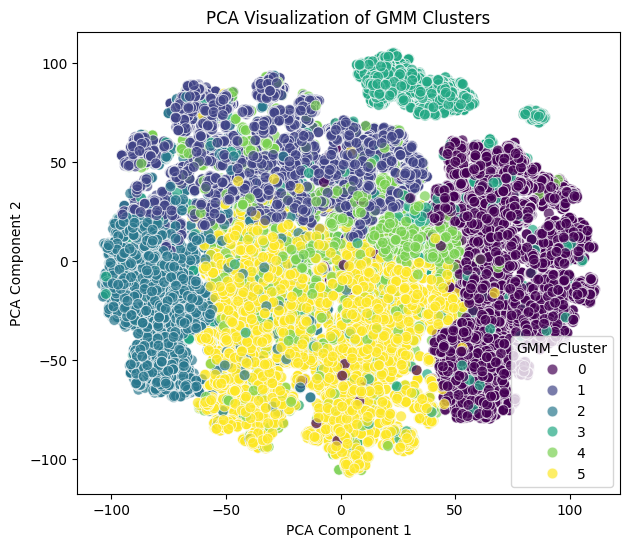

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model with the same number of clusters as K-Means (6 clusters)
gmm = GaussianMixture(n_components=6, random_state=42)
processed_data_df['GMM_Cluster'] = gmm.fit_predict(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']))

# Calculate silhouette and Davies-Bouldin scores for GMM
silhouette_gmm = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['GMM_Cluster'])
dbi_gmm = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                               processed_data_df['GMM_Cluster'])

# Print the evaluation scores for GMM
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")

# PCA visualization for GMM clusters
plt.figure(figsize=(7, 6))
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of GMM Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


The Gaussian Mixture Model (GMM) clustering results are as follows:

* Silhouette Score: 0.112, indicating weak cohesion and separation within clusters.
* Davies-Bouldin Index: 2.39, suggesting room for improvement in cluster definition.

# Visualization using t-SNE
(Takes ~30min to complete)

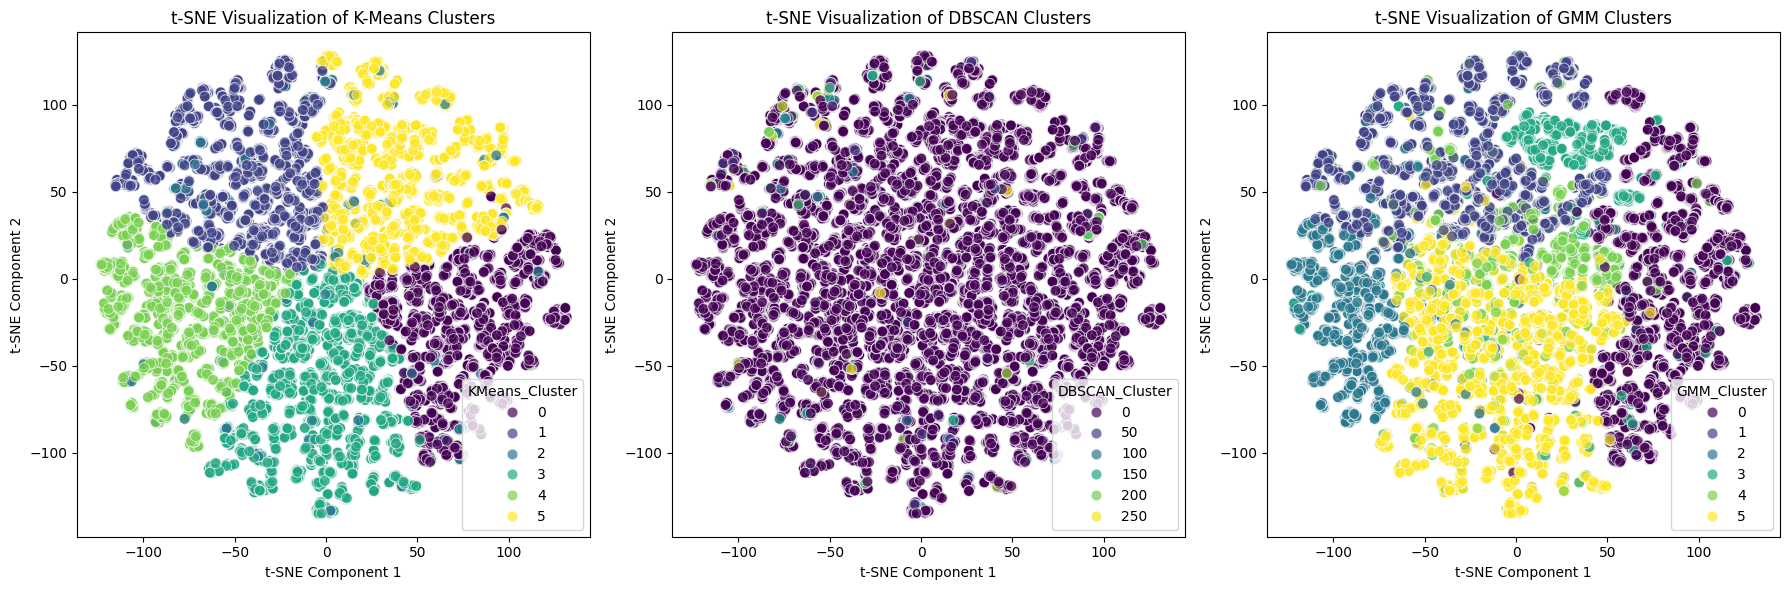

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']))


# Add t-SNE results to the DataFrame
processed_data_df['tSNE1'] = tsne_result[:, 0]
processed_data_df['tSNE2'] = tsne_result[:, 1]

# Plot t-SNE visualization for K-Means, DBSCAN, and GMM clusters
plt.figure(figsize=(18, 6))

# Plot for K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Plot for DBSCAN
plt.subplot(1, 3, 2)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='DBSCAN_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of DBSCAN Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Plot for GMM
plt.subplot(1, 3, 3)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of GMM Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()


# Exercise

* Apply K-NN, DBSCAN and GMM over the following dataset
* Visualize using PCA

In [ ]:
!gdown --id 1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Q6pdhzWFu2oegWMPvrOE8dWTra8FJsTf
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 13.9MB/s]


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
# Convert 'Gender' column to binary values: Male -> 1, Female -> 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [20]:
processed_data_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [19]:
# Load the newly provided dataset
# file_path = '/content/Mall_Customers.csv'
# processed_data_df = df.drop(columns=['CustomerID'])
 processed_data_df = df.drop(columns=['CustomerID'])


# Display the first few rows to understand the structure
processed_data_df.head()


IndentationError: unexpected indent (<ipython-input-19-0c0aa26f3b11>, line 4)

Elbow:

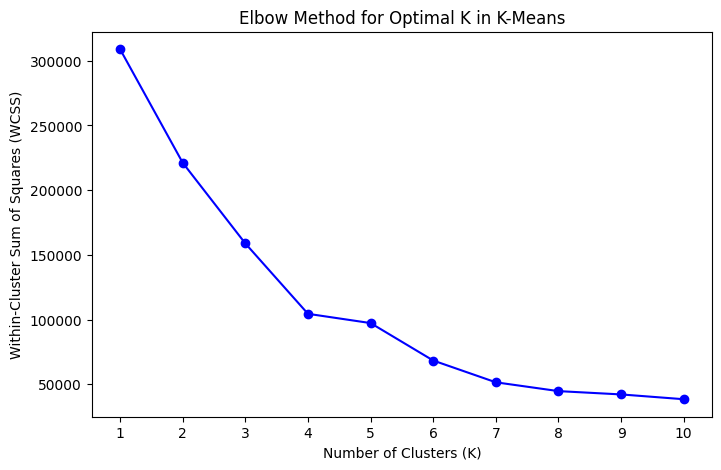

In [21]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()


In [24]:
# Check unique labels for DBSCAN
dbscan_labels = processed_data_df['DBSCAN_Cluster'].unique()
if len(dbscan_labels) > 1:
    silhouette_dbscan = silhouette_score(data, processed_data_df['DBSCAN_Cluster'])
    dbi_dbscan = davies_bouldin_score(data, processed_data_df['DBSCAN_Cluster'])
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")
else:
    print("DBSCAN produced a single cluster; Silhouette and Davies-Bouldin scores are not applicable.")


DBSCAN produced a single cluster; Silhouette and Davies-Bouldin scores are not applicable.


In [28]:
# Define number of clusters for K-Means
n_clusters = 6

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
processed_data_df['KMeans_Cluster'] = kmeans.fit_predict(processed_data_df)

# Apply DBSCAN clustering
# dbscan = DBSCAN(eps=0.7, min_samples=3)
# processed_data_df['DBSCAN_Cluster'] = dbscan.fit_predict(processed_data_df)

# PCA for 2D visualizationut
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']))
processed_data_df['PCA1'] = pca_result[:, 0]
processed_data_df['PCA2'] = pca_result[:, 1]

# Calculate evaluation scores
data = processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2'])
silhouette_kmeans = silhouette_score(data,
                                     processed_data_df['KMeans_Cluster'])
# silhouette_dbscan = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
#                                      processed_data_df['DBSCAN_Cluster'])
dbi_kmeans = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['KMeans_Cluster'])
# dbi_dbscan = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
#                                   processed_data_df['DBSCAN_Cluster'])

# Print evaluation scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
# print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")
# print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")




Silhouette Score (K-Means): 0.39351236469546313
Davies-Bouldin Index (K-Means): 0.9280861991601311


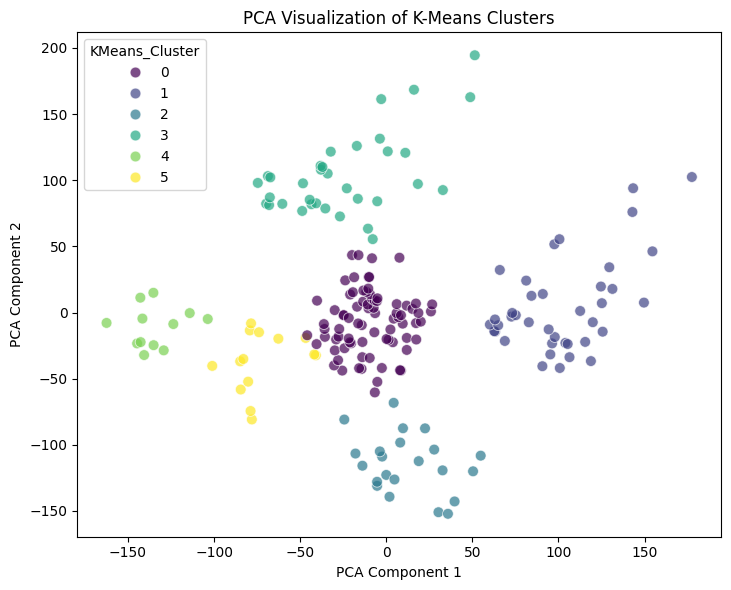

In [29]:
# Plot PCA visualization for K-Means and DBSCAN clusters
plt.figure(figsize=(14, 6))

# Plot for K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Plot for DBSCAN
# plt.subplot(1, 2, 2)
# sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=60, alpha=0.7)
# plt.title("PCA Visualization of DBSCAN Clusters")
# plt.xlabel("PCA Component 1")
# plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


GMM

Silhouette Score (GMM): 0.3941249906348975
Davies-Bouldin Index (GMM): 0.922558334883422


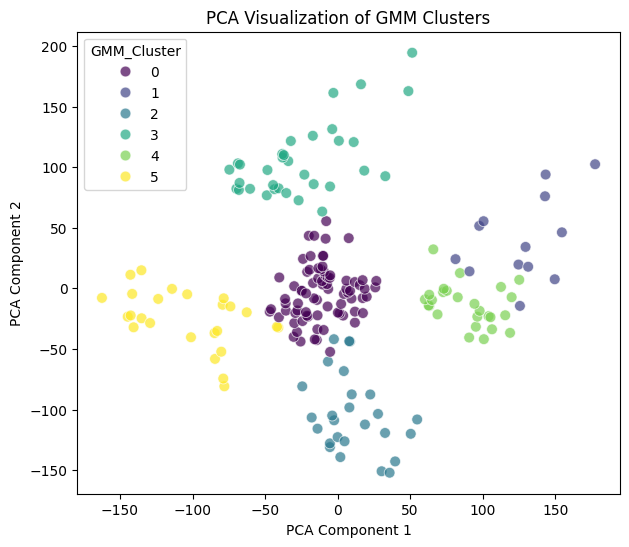

In [30]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model with the same number of clusters as K-Means (6 clusters)
gmm = GaussianMixture(n_components=6, random_state=42)
processed_data_df['GMM_Cluster'] = gmm.fit_predict(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']))

# Calculate silhouette and Davies-Bouldin scores for GMM
silhouette_gmm = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['GMM_Cluster'])
dbi_gmm = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                               processed_data_df['GMM_Cluster'])

# Print the evaluation scores for GMM
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")

# PCA visualization for GMM clusters
plt.figure(figsize=(7, 6))
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of GMM Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


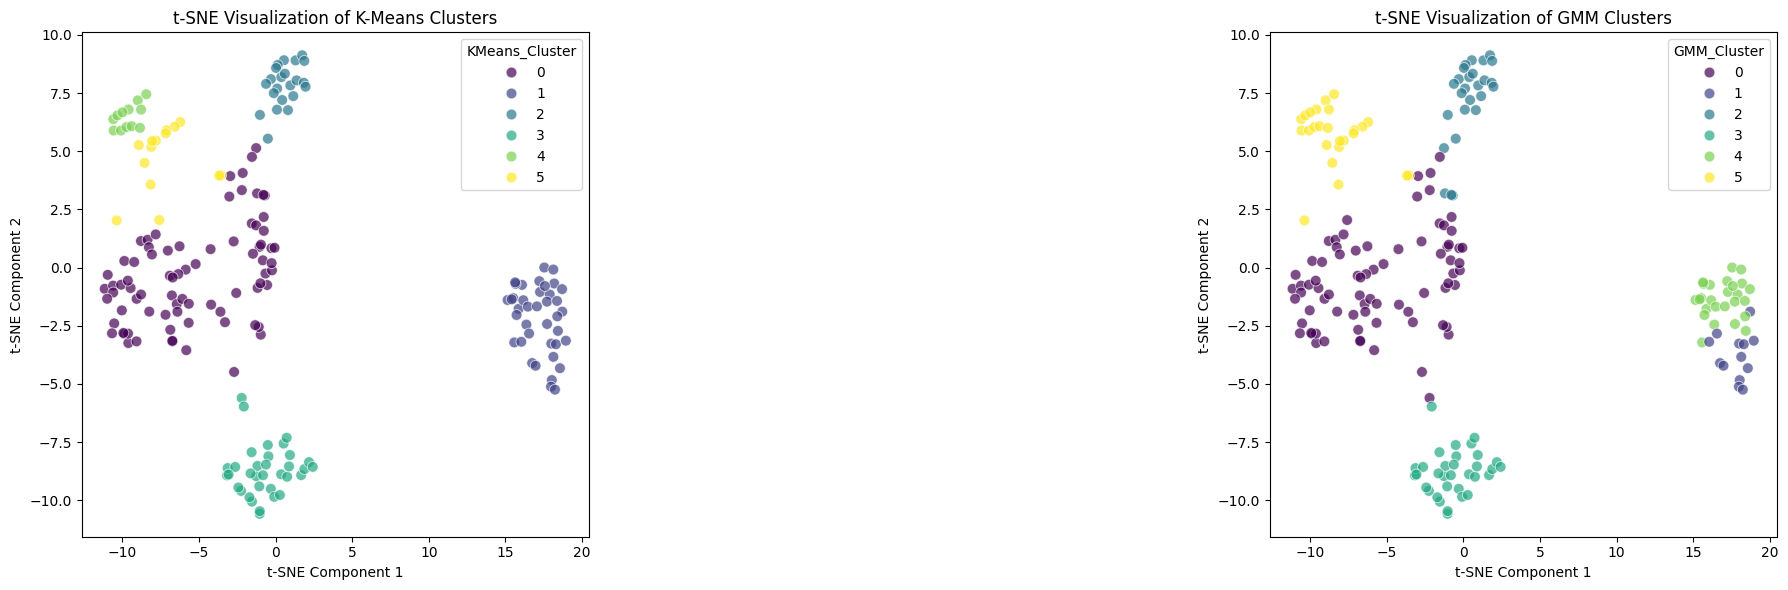

In [31]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']))


# Add t-SNE results to the DataFrame
processed_data_df['tSNE1'] = tsne_result[:, 0]
processed_data_df['tSNE2'] = tsne_result[:, 1]

# Plot t-SNE visualization for K-Means, DBSCAN, and GMM clusters
plt.figure(figsize=(18, 6))

# Plot for K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Plot for DBSCAN
# plt.subplot(1, 3, 2)
# sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='DBSCAN_Cluster', palette='viridis', s=60, alpha=0.7)
# plt.title("t-SNE Visualization of DBSCAN Clusters")
# plt.xlabel("t-SNE Component 1")
# plt.ylabel("t-SNE Component 2")

# Plot for GMM
plt.subplot(1, 3, 3)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of GMM Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

plt.tight_layout()
plt.show()
